# 2 Statistical Learning

## 2.1 What Is Statistical Learning?
A set of methods to find the form of $f$ that will accurately predict a quantitative response $Y$ from a set of predictors $X=X_1,X_2,\ldots,X_p$. The general form can be written as
\begin{align}\tag{2.1}
Y = f(X) + \epsilon
\end{align}

$f$ is some fixed but unkown function of $X_1,\ldots,X_p$.  
$\epsilon$ is a random _error term_.  
$Y$ is the quantitative response value we are trying to predict.

### 2.1.1 Why Estimate $f$ ?

#### Prediction
Estimating the response $Y$ for a given set of predictors $X$.
\begin{align}\tag{2.2}
\hat{Y} = \hat{f}(X)
\end{align}
where $\hat{f}$ represents the estimate for $f$, and $\hat{Y}$ represents the prediction for $Y$.  

The accuracy of $\hat{Y}$ depends on two quantities: the _reducible error_ and the _irreducible error_.
\begin{align}\tag{2.3}
E(Y - \hat{Y})^2 &= E \left[ f(x) + \epsilon - \hat{f}(X) \right]^2 \\
                 &= \underbrace{ \left[ f(X) - \hat{f}(X) \right]^2 }_{\text{Reducible}} +
                    \underbrace{ \text{Var}(\epsilon) }_{\text{Irreducible}}
\end{align}
The _reducible error_ is the focus of minimization with statistical learning methods. The _irreducible error_ cannot be reduced or eliminated and thus provides an upper bound on the accuracy of the prediction for $Y$.  

$E(Y - \hat{Y})^2$ represents the average, or _expected value_, of the squared difference between the predicted and actual value of $Y$.  
$\text{Var}(\epsilon)$ represents the _variance_ associated with the error term $\epsilon$.

#### Inference
Understanding the relationship between the response $Y$ and the set of predictors $X=X_1,\ldots,X_p$. These relationships can be used to answer genral questions such as:
* Which predictors are associated with the response?
* What is the relationship between the response and each predictor?
* Can the relationship between $Y$ and each predictor be adequately summarized using a linear equation, or is the relationship more complicated?

### 2.1.2 How Do We Estimate $f$ ?
Statistical learning methods can be characterized as either _parametric_ or _non-parametric_.  

#### Parametric Methods
1. We make an assumption of the form or shape of $f$. For example, an assumption can be that $f$ is linear in $X$:
\begin{align}\tag{2.4}
f(X) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p\text{.}
\end{align}
2. After the model has been selected, we need a procedure that uses the training data to _fit_ or _train_ the model. This means estimating the parameters $\beta_0, \beta_1, \ldots, \beta_p$.
\begin{align}
Y \approx \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p\text{.}
\end{align}
The most common approach to fitting the model (2.4) is referred to as _(ordinary) least squares_.

This model-based approach is referred to as _parametric_; it reduces the problem of estimating $f$ down to one of estimating a set of paramters. The model that we choose will usually not match the true unkown form of $f$. It is just an estimate. If we choose a model that is too far from the true $f$, then our estimate will be poor.  

Fitting a more flexible model  requires estimating a greater number of parameters and has the danger of _overfitting_ the data. When this occurs, the model will follow the rrors, or _noise_, too closely.

#### Non-Parametric Methods
Non-parametric methods do not make explicit assumptions about the functional form of $f$. By avoiding the assumption of a particular form of $f$, the method has the potential to accurately fit a wider range of possible shapes for $f$.  

A major issue with non-parametric methods is that, because they do not reduce the problem of estimating $f$ to a small number of parameters, a very large number of observations are needed to obtain an accurate estimate for $f$.

### 2.1.3 The Trade-Off Between Prediction Accuracy and Model Interpretability

### 2.1.4 Supervised Versus Unsupervised Learning

### 2.1.5 Regression Versus Classification Problems

## 2.2 Assessing Model Accuracy

### 2.2.1 Measuring the Quality of Fit
The most commonly-used measure of how close the predicted response value for a given observation is to the true response value of that observation is called the _mean squared error_ (MSE)
\begin{align}\tag{2.5}
\text{MSE} = \frac{1}{n} \sum^n_{i=1}{ (y_i - \hat{f}(x_i))^2 }\text{,}
\end{align}

$\hat{f}(x_i)$ is the prediction that $\hat{f}$ gives for the _i_ th observation.  
The MSE will be small if the predicted responses  are very close to the true responses, and will be large if for some of the observations, the predicted and true responses differ substantially.  

The MSE in (2.5) is used to compute the _training MSE_. However, we are usually not interested in how well the method works on _training data_. We are mostly interested on how well the method works on previously unseen data called the _test_data_.  

We want to know whether $\hat{f}(x_0)$ is approximately equal to $y_0$. Where $(x_0, y_0)$ is a previously unseen test observation not used to train the statisical learning method. We want to choose the method that gives the lowest _test MSE_, as opposed to the lowest training MSE. If we have a large number of test observations, we could compute
\begin{align}\tag{2.6}
\text{Ave}(y_0 - \hat{f}(x_0))^2\text{,}
\end{align}
the average squared prediction error for these test observations $(x_0, y_0)$. We'd like to select the model for which this quantity is as small as possible.

### 2.2.2 The Bias-Variance Trade-Off

### 2.2.3 The Classification Setting

#### The Bayes Classifier

#### K-Nearest Neighbors

## Flexibility
A model is said to be less flexible or more restrictive, in the sense that they can produce just a relatively small range of shapes to estimate $f$. For example, linear regression is a relatively inflexible approach, because it can only generate linear functions.

In [1]:
Advertising <- subset(read.csv("../99DataSets/Advertising.csv"),select = -X)
attach(Advertising)

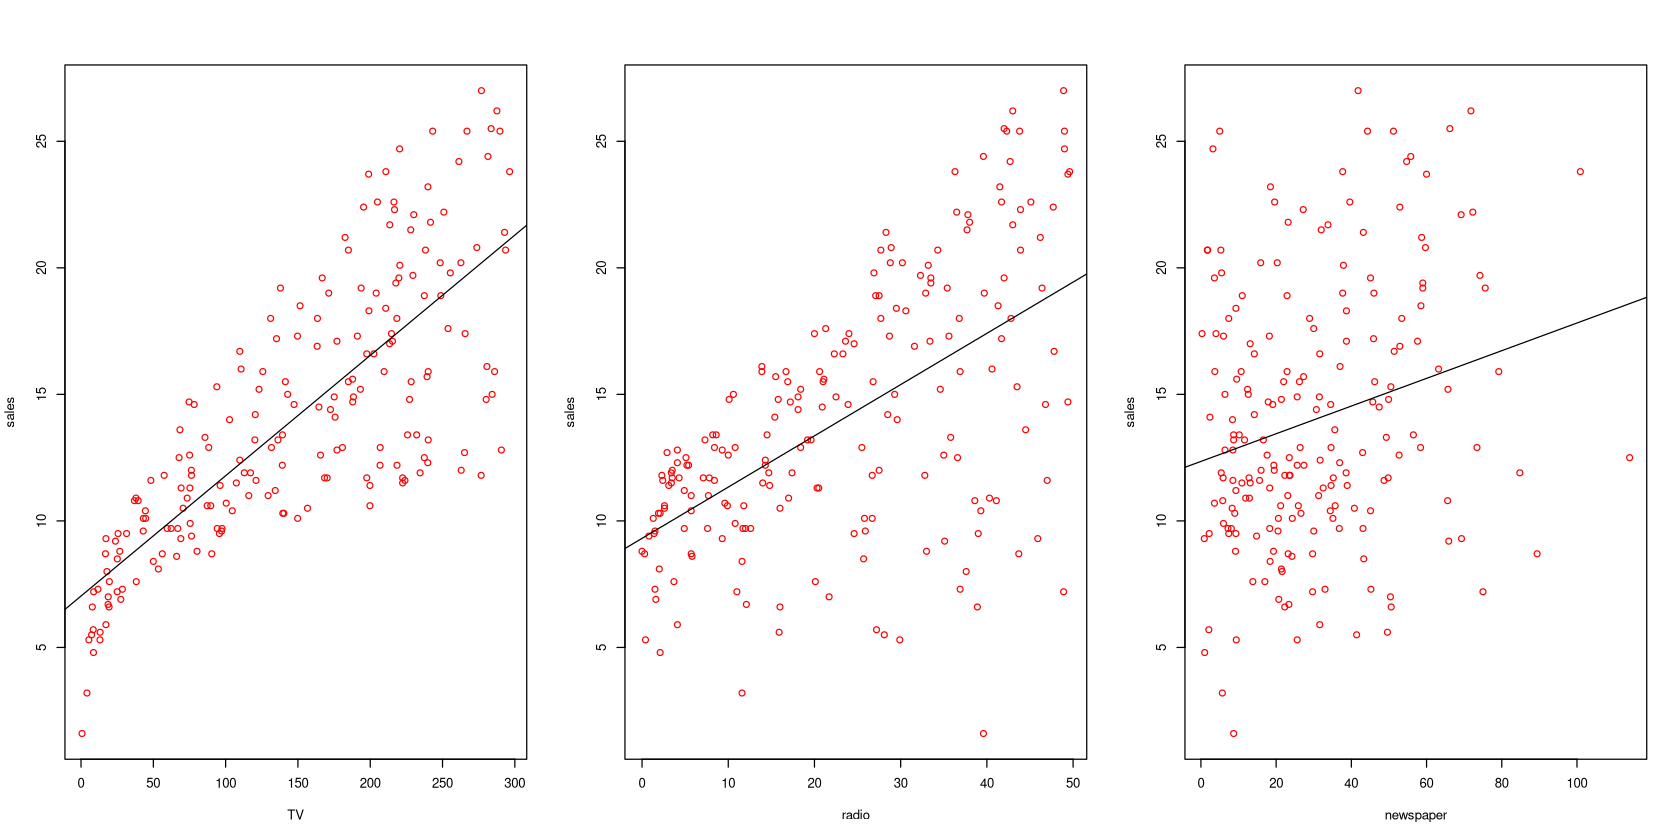

In [10]:
par(mfrow = c(1, 3))
options(repr.plot.width=14, repr.plot.height=7)
plot(TV,sales, col="red")
abline(lm(sales ~ TV, data = Advertising))
plot(radio, sales, col="red")
abline(lm(sales ~ radio, data = Advertising))
plot(newspaper, sales, col="red")
abline(lm(sales ~ newspaper, data = Advertising))